# Data extraction
parameters:
- dataset: 2023_02_01
- fetch_api = "http://candy.hesge.ch:8900/SIBiLS/fetch"

In [30]:

import os
from base_fns import get_local_folder
project_path = os.path.join(get_local_folder(), '..' )
%cd $project_path

from src.utils import split_list

from pathlib import Path
from IPython.display import display
from tqdm import tqdm
import requests
import orjson
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles


/home/paulvanrijen/data/CellTriage



## PMIDS




In [31]:
# read samples
NEG_FP = "./data/20230201/publication_negative_set.tsv"
POS_FP = "./data/20230201/publication_positive_set.tsv"

with open(NEG_FP, "r") as f:
    neg_set = f.read().splitlines() [1:]
    # neg_set = neg_set[1:]
print(f"#neg pmids: {len(neg_set)}")

with open(POS_FP, "r") as f:
    pos_set = f.read().splitlines() [1:]
print(f"#pos pmids: {len(pos_set)}")


#neg pmids: 644
#pos pmids: 22719


## SIBiLS

### negatives

In [32]:

URL_API = "http://candy.hesge.ch:8900/SIBiLS/fetch"
NEG_JSON_FP = "./data/20230201/SIBiLS_v3/publication_negative_set.json"
CHUNK_SIZE = 500


concat_response = []
for chunk in tqdm(split_list(neg_set, CHUNK_SIZE)):
    params = {"col": "medline",
              "ids": ",".join(chunk)}
    r = requests.post(url=URL_API, params=params)
    concat_response.extend(orjson.loads(r.text))

with open(NEG_JSON_FP, "wb") as f:
    f.write(orjson.dumps(concat_response))


print("#neg documents fetched:", len(concat_response))

2it [00:13,  6.75s/it]


#neg documents fetched: 548


In [20]:
NEG_FAILED_JSON = "./data/20230201/SIBiLS_v3/publication_negative.failed.json"

with open(NEG_JSON_FP, "rb") as f:
    out_neg_json = orjson.loads(f.read())
    out_neg_pmids = set([doc["record"]["pmid"] for doc in out_neg_json])
in_neg_pmids = set(neg_set)
delta_neg_pmids = in_neg_pmids - out_neg_pmids

with open(NEG_FAILED_JSON, "wb") as f:
    f.write(orjson.dumps(list(delta_neg_pmids)))


print("#neg documents not fetched:", len(delta_neg_pmids))
print(delta_neg_pmids)


#neg documents not fetched: 96
{'20301652', '36585754', '27336128', '36608618', '36351163', '34097371', '36636475', '20301779', '20301336', '36351160', '34941234', '36519179', '34756847', '36636470', '29939552', '36670520', '34941228', '36564866', '36564867', '34941229', '36608617', '34756845', '36585757', '33270410', '36608616', '35274913', '20301483', '20301761', '34941235', '34941232', '35267247', '36564870', '36585756', '36670523', '36606118', '36282940', '31082146', '35050562', '34941236', '35274912', '36519010', '36564868', '34941231', '36564871', '34003615', '35032962', '36606116', '31643906', '35274911', '36512654', '34648250', '36585755', '34941230', '34756846', '36636471', '24027799', '20301508', '35050561', '36351164', '34941233', '36351157r', '20301685', '28520346', '35704653', '20301490', '26389437', '24175354', '36519011', '36670522', '34648251', '36564872', '36351161', '36519009', '36519007', '31643973', '36636474', '36608615', '20301750', '26389331', '36351159', '366705

Some examples:

http://candy.hesge.ch:8900/SIBiLS/fetch?col=medline&ids=36519011,36636475,36585755  
https://pubmed.ncbi.nlm.nih.gov/36519011/  
https://pubmed.ncbi.nlm.nih.gov/36636475/  
https://pubmed.ncbi.nlm.nih.gov/36585755/  


### fetch loss on negative samples (#pmid=644) by SIBiLS version

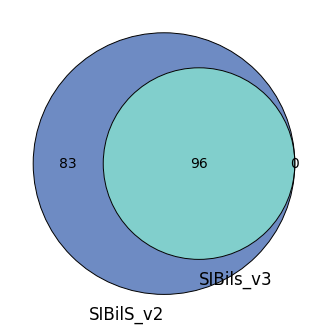

In [21]:
NEG_FAILED_JSON_SIBILS_v2 = "./data/20230201/SIBiLS_v2/publication_negative.failed.json"

with open(NEG_FAILED_JSON_SIBILS_v2, "rb") as f:
    out_neg_json_v2 = orjson.loads(f.read())
    out_neg_pmids_v2 = set(out_neg_json_v2)


plt.figure(figsize=(4,4))
c= venn2([out_neg_pmids_v2, delta_neg_pmids], 
      set_colors=('#3E64AF', '#3EAF5D', '#D74E3B'), 
      set_labels = ('SIBilS_v2', 
                    'SIBils_v3'),
      alpha=0.75)
venn2_circles([out_neg_pmids_v2, delta_neg_pmids], lw=0.7)
plt.show()

### positives

In [22]:
URL_API = "http://candy.hesge.ch:8900/SIBiLS/fetch"
POS_JSON_FP = "./data/20230201/SIBiLS_v3/publication_posive_set.json"
CHUNK_SIZE = 500


concat_response = []
for chunk in tqdm(split_list(pos_set, CHUNK_SIZE)):
    params = {"col": "medline",
              "ids": ",".join(chunk)}
    r = requests.post(url=URL_API, params=params)
    concat_response.extend(orjson.loads(r.text))

with open(POS_JSON_FP, "wb") as f:
    f.write(orjson.dumps(concat_response))


print("#pos documents:", len(concat_response))


46it [13:27, 17.56s/it]


#pos documents: 22710
